In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# EDA  (EXPLORATORY DATA ANALYSIS ) #

1. Importación del conjunto de datos

In [67]:
url = 'https://raw.githubusercontent.com/Payer09/TFM/refs/heads/main/bbdd_TFM.csv?token=GHSAT0AAAAAACZKY2YLU4PFMPZYHQVRO3NYZYXRWZA'

In [68]:
df = pd.read_csv('bbdd_TFM.csv', sep = ';')

2. Visualización general del conjunto de datos

In [69]:
# Tamaño del dataset
df.shape

(69, 15)

In [70]:
# Primeras filas del dataset
df.head()

,Fecha de nacimiento,Date of PET/CT,Histología,MTV_TOTAL,TLG_TOTAL,MTV_INFRADIA_TOTAL,TLG_INFRADIA_TOTAL,P_MTV_TOTAL,P_TLG_TOTAL,P_MTV_HABDSUP,P_TLG_HABDSUP,P_MTV_HABDINF,P_TLG_HABDINF,SUVMAX_LIQASC,Enfermedad Residual
0,20/05/1959,07/11/2018,HGSOC,444.85,1125.72,444.85,1125.72,444.85,1125.72,88.40,162.60,177.13,415.10,2.49,1
1,17/08/1963,19/11/2020,HGSOC,779.84,5028.11,93.84,194.30,93.84,194.30,0.00,0.00,0.00,0.00,2.70,0
2,04/09/1951,13/02/2020,HGSOC,1173.99,3910.80,1147.45,3864.79,1147.45,3864.79,771.50,1883.77,100.62,480.35,2.70,1
3,07/06/1946,12/07/2019,HGSOC,386.84,1266.43,386.84,1266.43,386.84,1266.43,218.54,275.07,89.60,147.08,1.79,0
4,18/01/1967,15/03/2021,Carcinosarcoma ovárico,248.28,376.60,245.45,372.59,233.12,356.35,7.13,11.82,120.51,189.46,0.00,0


In [71]:
#Resumen de variables estadísticas del conjunto de datos
df.describe()

,MTV_TOTAL,TLG_TOTAL,MTV_INFRADIA_TOTAL,TLG_INFRADIA_TOTAL,P_MTV_TOTAL,P_TLG_TOTAL,P_MTV_HABDSUP,P_TLG_HABDSUP,P_MTV_HABDINF,P_TLG_HABDINF,SUVMAX_LIQASC,Enfermedad Residual
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,182.268261,851.952754,152.788261,660.955797,113.060580,391.646232,29.490145,77.595217,40.805797,155.151594,0.437391,0.173913
std,252.178956,1377.140117,221.838439,1191.648199,209.207873,757.036631,98.960523,241.919640,84.096924,343.422988,1.051089,0.381812
min,0.940000,3.230000,0.940000,2.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.120000,65.940000,14.120000,63.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.310000,230.590000,36.850000,158.420000,12.440000,50.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,288.210000,1179.280000,245.450000,819.880000,122.180000,356.350000,19.770000,66.080000,48.080000,121.970000,0.000000,0.000000
max,1173.990000,7824.460000,1147.450000,7824.460000,1147.450000,3864.790000,771.500000,1883.770000,455.030000,1752.110000,3.900000,1.000000


In [72]:
#Información sobre los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha de nacimiento   69 non-null     object 
 1   Date of PET/CT        69 non-null     object 
 2   Histología            69 non-null     object 
 3   MTV_TOTAL             69 non-null     float64
 4   TLG_TOTAL             69 non-null     float64
 5   MTV_INFRADIA_TOTAL    69 non-null     float64
 6   TLG_INFRADIA_TOTAL    69 non-null     float64
 7   P_MTV_TOTAL           69 non-null     float64
 8   P_TLG_TOTAL           69 non-null     float64
 9   P_MTV_HABDSUP         69 non-null     float64
 10  P_TLG_HABDSUP         69 non-null     float64
 11  P_MTV_HABDINF         69 non-null     float64
 12  P_TLG_HABDINF         69 non-null     float64
 13  SUVMAX_LIQASC         69 non-null     float64
 14  Enfermedad Residual   69 non-null     int64  
dtypes: float64(11), int64(1),

Se observa que el cojunto de datos no presenta nulos

3. Renombramos la variable objetivo o clase

In [80]:
#Cambiamos la columna enfermdad residual por citoreducion completa
df.rename(columns={'Enfermedad Residual': 'citorreduccion_completa'}, inplace=True)

In [81]:
# Invertimos los valores 1 por 0 y 0 por 1 en la columna
df['citorreduccion_completa'] = df['citorreduccion_completa'].replace({1: 0, 0: 1})

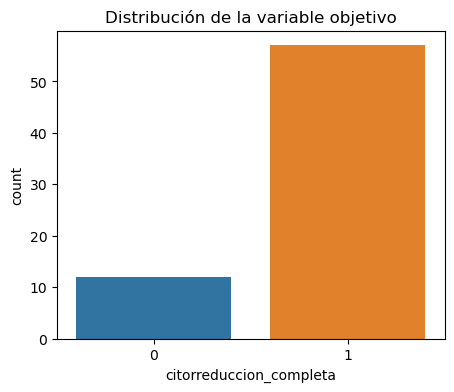

citorreduccion_completa
1    57
0    12
Name: count, dtype: int64


In [82]:
# Visualizamos la distribución de la variable objetivo
plt.figure(figsize=(5, 4))
sns.countplot(x='citorreduccion_completa', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()

recuento = df['citorreduccion_completa'].value_counts()
print(recuento)

Se observa un claro desbalance de la clase, siendo predominante ejemplos donde se ha podido realizar la cito reducción completa de los pacientes

4. Cálculo de nueva variable 'edad' a partir de las variables 'Fecha de nacimiento' y 'Date of PET/CT'

In [83]:
# Convertir las columnas 'Fecha de nacimiento' y 'Date of PET/CT' a formato de fecha
df['Fecha de nacimiento '] = pd.to_datetime(df['Fecha de nacimiento '],format='%d/%m/%Y')
df['Date of PET/CT'] = pd.to_datetime(df['Date of PET/CT'], format='%d/%m/%Y')

In [85]:
# Calcular la diferencia en años
df['Edad'] = (df['Date of PET/CT'] - df['Fecha de nacimiento ']).dt.days // 365

In [87]:
# Se eliminan columnas que no aportan información
df.drop(columns = ['Fecha de nacimiento ', 'Date of PET/CT'], inplace=True)

5. Visualización de la distribución de las variables

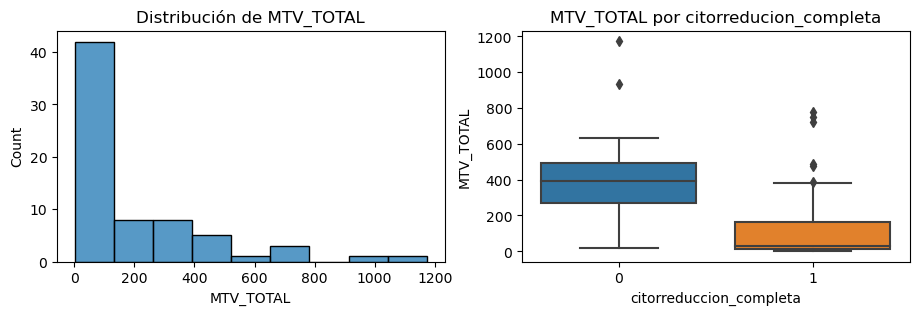

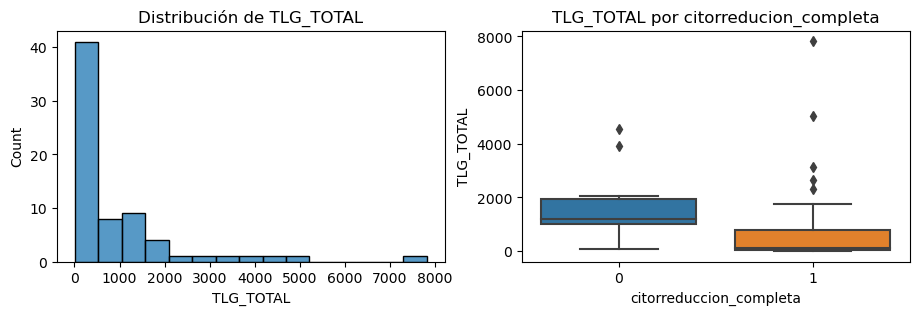

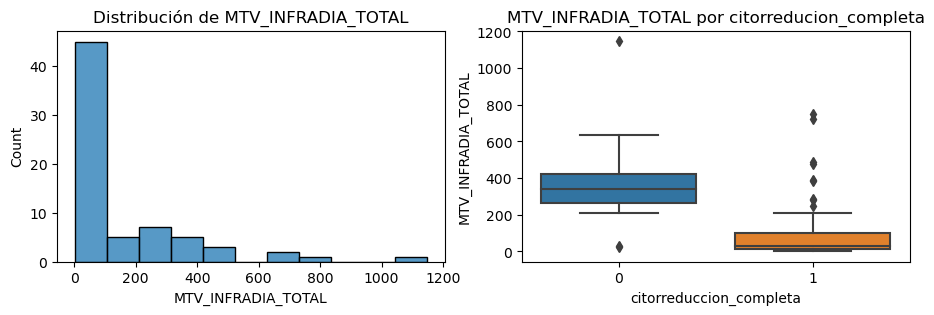

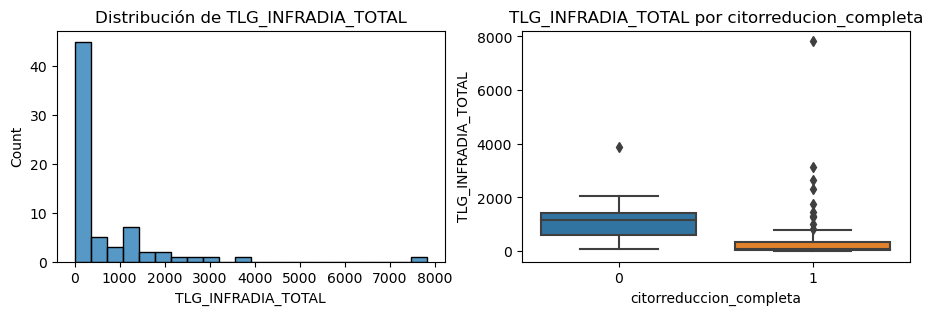

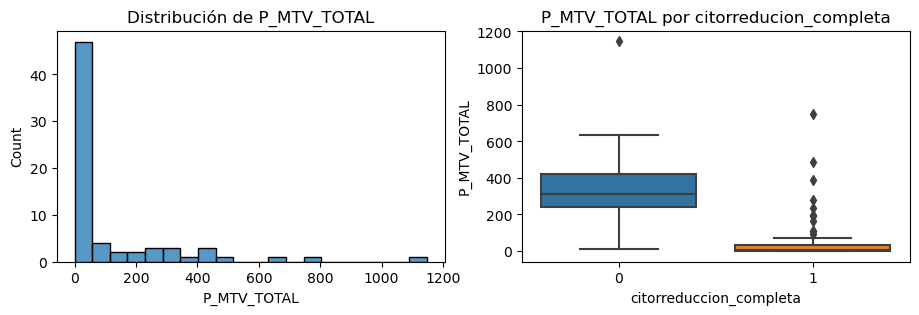

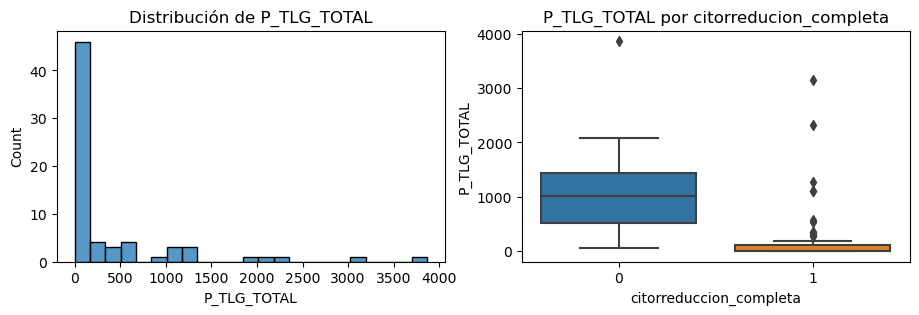

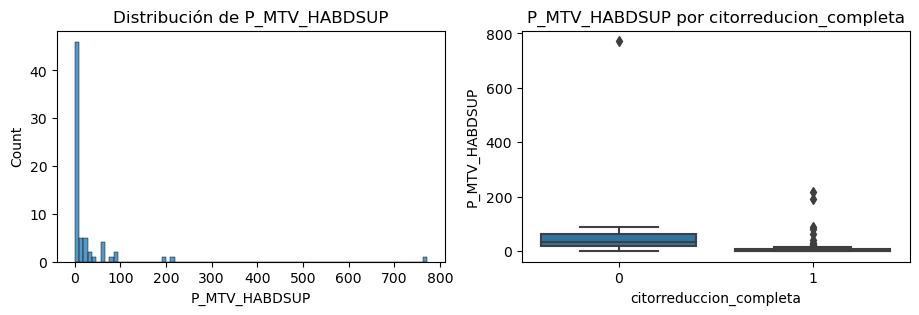

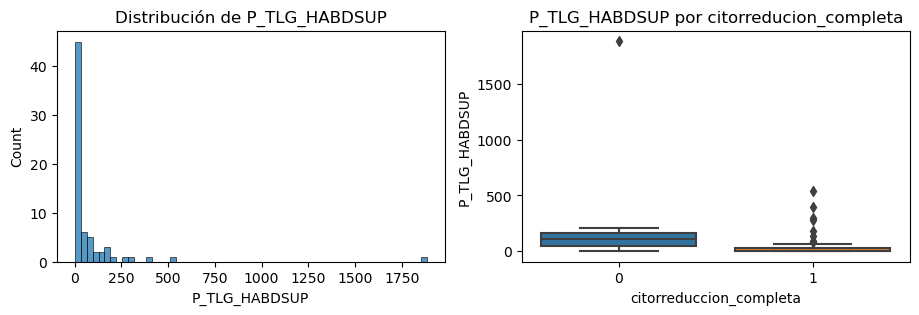

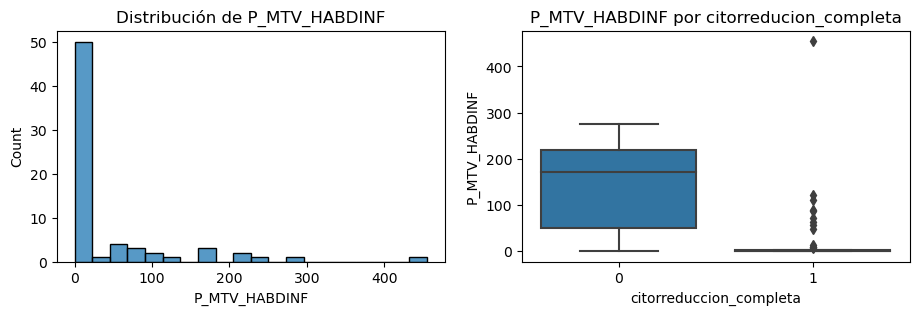

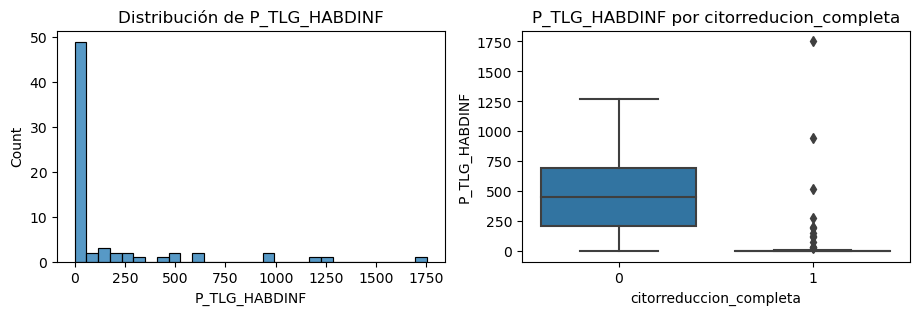

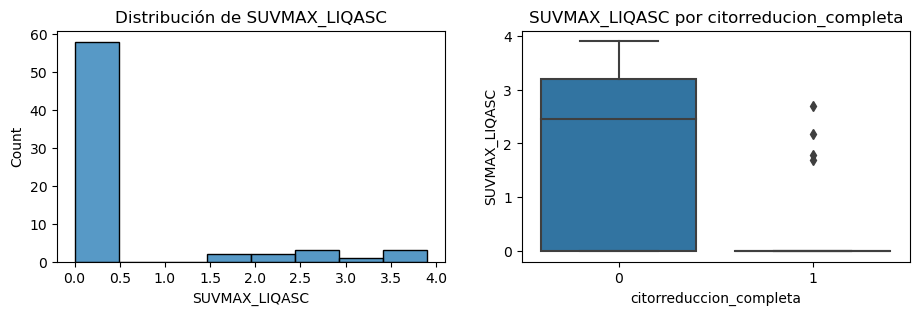

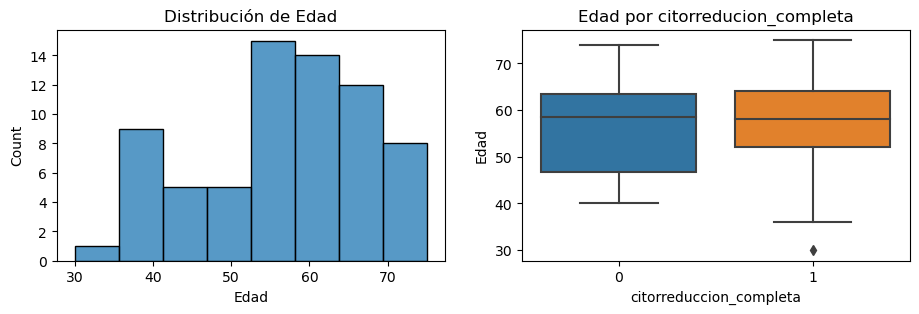

In [106]:
numeric_vars = df.select_dtypes(include = ['float64', 'int64']).columns.drop('citorreduccion_completa')

for var in numeric_vars:
    plt.figure(figsize = (11, 3))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[var])
    plt.title(f'Distribución de {var}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = 'citorreduccion_completa', y = var, data = df)
    plt.title(f'{var} por citorreducion_completa')

    plt.show()

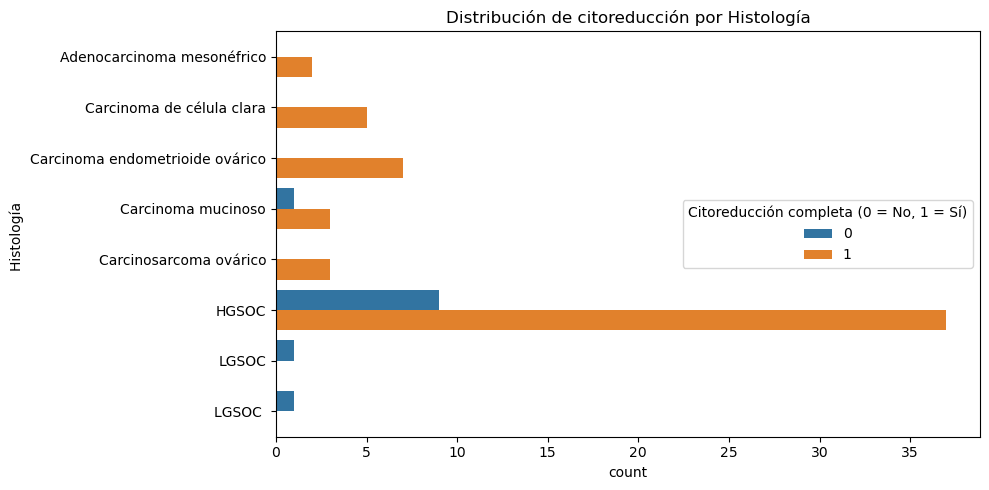

In [128]:
# Crear un nuevo DataFrame que cuenta los pacientes por histología y cito-reducción
histologia_counts = df.groupby(['Histología ', 'citorreduccion_completa']).size().reset_index(name='count')

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Crear un gráfico de columnas horizontales
sns.barplot(data=histologia_counts, y='Histología ', x='count', hue='citorreduccion_completa')

# Añadir etiquetas y título
plt.title('Distribución de citoreducción por Histología')
plt.legend(title='Citoreducción completa (0 = No, 1 = Sí)')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

6. Matriz de correlación de las variables numéricas

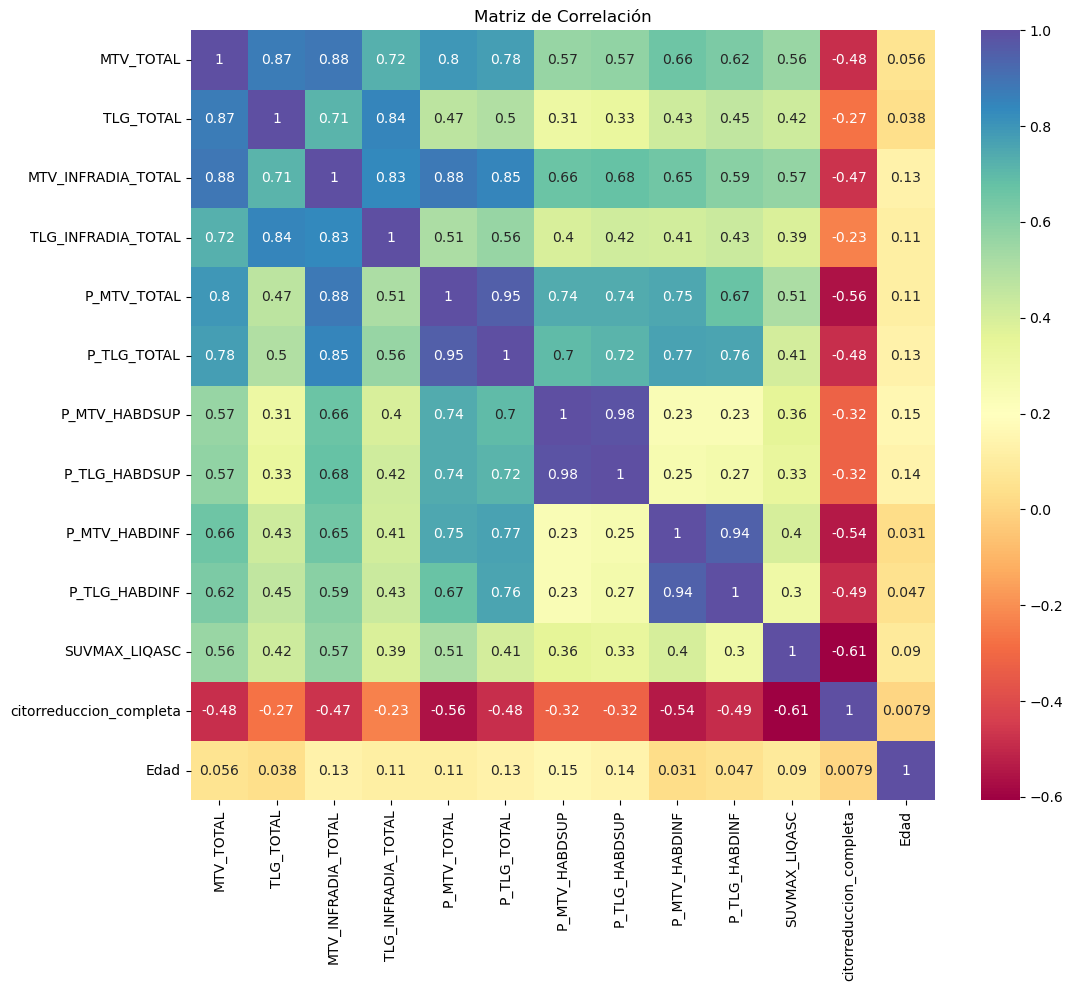

In [142]:
# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include = [np.number])

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'Spectral')
plt.title('Matriz de Correlación')
plt.show()

In [17]:
#Mostrar la correlación con citorreducion_completa para cada variable
for var in numeric_vars:
    correlation = df[[var, 'citorreducion_completa']].corr().iloc[0, 1]
    print(f"Correlación entre {var} y citorreducion_completa: {correlation:.2f}")

Correlación entre MTV_TOTAL y citorreducion_completa: -0.48
Correlación entre TLG_TOTAL y citorreducion_completa: -0.27
Correlación entre MTV_INFRADIA_TOTAL y citorreducion_completa: -0.47
Correlación entre TLG_INFRADIA_TOTAL y citorreducion_completa: -0.23
Correlación entre P_MTV_TOTAL y citorreducion_completa: -0.56
Correlación entre P_TLG_TOTAL y citorreducion_completa: -0.48
Correlación entre P_MTV_HABDSUP y citorreducion_completa: -0.32
Correlación entre P_TLG_HABDSUP y citorreducion_completa: -0.32
Correlación entre P_MTV_HABDINF y citorreducion_completa: -0.54
Correlación entre P_TLG_HABDINF y citorreducion_completa: -0.49
Correlación entre SUVMAX_LIQASC y citorreducion_completa: -0.61
Correlación entre Edad y citorreducion_completa: 0.01


Se puede observar que prácticamente la totalidad de las variables tienen correlaciónn con la cito reducción

7. Detección de outliers

In [145]:
# Usamos el rango intercuartílico para detectar outliers
outlier_results = []
for var in numeric_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    RI = Q3 - Q1
    outliers = df[(df[var] < (Q1 - 1.5 * RI)) | (df[var] > (Q3 + 1.5 * RI))]
      # Añadir el resultado a la lista
    outlier_results.append({'Variable': var, 'Outliers Detectados': outliers.shape[0]})

# Crear un DataFrame con los resultados
outlier_table = pd.DataFrame(outlier_results)

# Mostrar la tabla
(outlier_table)

,Variable,Outliers Detectados
0,MTV_TOTAL,5
1,TLG_TOTAL,5
2,MTV_INFRADIA_TOTAL,4
3,TLG_INFRADIA_TOTAL,6
4,P_MTV_TOTAL,9
5,P_TLG_TOTAL,12
6,P_MTV_HABDSUP,10
7,P_TLG_HABDSUP,8
8,P_MTV_HABDINF,9
9,P_TLG_HABDINF,11


Dado el reducido número de pacientes (69 en total), se ha decidido no eliminar ningún outlier en el análisis. En un conjunto de datos clínico tan pequeño, los valores atípicos no necesariamente reflejan ruido o errores, sino que pueden representar variabilidad legítima dentro de la población de estudio. Estos valores podrían estar menos representados simplemente debido al tamaño limitado de la muestra, sin que ello implique que no sean clínicamente relevantes.

Eliminar estos valores extremos podría llevar a la pérdida de información valiosa, especialmente en un contexto clínico. En lugar de ser considerados como anomalías, es posible que los outliers reflejen casos particulares que, lejos de ser ruido, aporten datos esenciales para comprender la heterogeneidad entre los pacientes. Por ejemplo, un valor muy elevado de MTV_total podría ser un fuerte predictor clínico de que no se logrará una citorreducción completa. Ignorar estos casos, únicamente por ser menos comunes, podría privar al análisis de información clave para la toma de decisiones médicas.

En este contexto, los valores extremos suelen tener una importancia clínica significativa. Valores elevados de determinadas variables podrían estar vinculados a condiciones críticas que requieren atención especial y no deben ser descartados sin una evaluación adecuada.

En resumen, debido al pequeño tamaño de la muestra y a la relevancia clínica de los valores extremos, mantener los outliers en el análisis es crucial para capturar toda la variabilidad del conjunto de datos y garantizar que no se pierdan predictores importantes.

9. Pruebas estadísticas. Se va a comproobar si hay diferencias significativas entre ambos grupos

In [147]:
# Lista de variables numéricas sin 'citorreducion_completa'
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_vars.remove('citorreduccion_completa')

In [149]:
# Grupos de 'citorreducion_completa'
grupo_completa  = df[df['citorreduccion_completa'] == 1]
grupo_no_completa  = df[df['citorreduccion_completa'] == 0]

In [155]:
resultados = []
# Prueba t para cada variable
for var in numeric_vars:
    stat, p_value = ttest_ind(grupo_completa[var], grupo_no_completa[var], equal_var = False)
    
    # Determinar si es estadísticamente significativo
    significativo = "Sí" if p_value < 0.05 else "No"
    # Añadir los resultados a la lista
    resultados.append({'Variable': var, 'P-valor': p_value, 'Estadísticamente Significativo': significativo})
    
# Convertir la lista en un DataFrame
df_resultados = pd.DataFrame(resultados)

df_resultados

,Variable,P-valor,Estadísticamente Significativo
0,MTV_TOTAL,0.006641,Sí
1,TLG_TOTAL,0.033804,Sí
2,MTV_INFRADIA_TOTAL,0.008472,Sí
3,TLG_INFRADIA_TOTAL,0.044006,Sí
4,P_MTV_TOTAL,0.004811,Sí
5,P_TLG_TOTAL,0.009843,Sí
6,P_MTV_HABDSUP,0.206644,No
7,P_TLG_HABDSUP,0.204314,No
8,P_MTV_HABDINF,0.001136,Sí
9,P_TLG_HABDINF,0.004117,Sí


Se observa por tanto que las diferencias en la mayoria de variables de cada grupo son estadisticamente significativas, lo que nos indica que pueden servir como predictoras para determinar la citorreducción completa

# Creación de datos sintéticos #

Para crear los datos sintéticos a partir del conjunto de datos que tenemos, empleamos Redes neuronales generativas antagónicas (GANs)

La estructura de una GAN es la siguiente:
- Generador (G): Es una red que toma un vector de ruido aleatorio como entrada y genera datos falsos (sintéticos) que tratan de parecerse al conjunto de datos reales.
- Discriminador (D): Es otra red que toma una muestra y trata de diferenciar entre datos reales y datos generados por el generador.

El objetivo del generador es engañar al discriminador produciendo datos que se asemejen lo más posible a los datos reales, mientras que el discriminador trata de mejorar su habilidad para distinguir entre datos reales y sintéticos.

In [22]:
!pip install sdv

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.35.39 which is incompatible.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.



  Obtaining dependency information for sdv from https://files.pythonhosted.org/packages/41/63/f4b99bbbaab27847fc2345c830f7003289b4713ded9b0ea17c76acf8c9e3/sdv-1.17.1-py3-none-any.whl.metadata
  Using cached sdv-1.17.1-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for boto3<2.0.0,>=1.28 from https://files.pythonhosted.org/packages/5a/ad/ba203ea67522d1184aa879d7ac063e5ffc7e6bafe00b4f79124e5fca0128/boto3-1.35.39-py3-none-any.whl.metadata
  Obtaining dependency information for botocore<2.0.0,>=1.31 from https://files.pythonhosted.org/packages/76/1f/296dc3b4c70b84328715fb7ee45f1d422fbed83cbcd464a3d4f29e91d197/botocore-1.35.39-py3-none-any.whl.metadata
  Obtaining dependency information for copulas>=0.11.0 from https://files.pythonhosted.org/packages/76/a2/3972bc9afe1d95cc5766fd61d1302bbffd7bbd95ec9cc179c8624de999ec/copulas-0.11.1-py3-none-any.whl.metadata
  Using cached copulas-0.11.1-py3-none-any.whl.metadata (9.1 kB)
  Obtaining dependency information for ctgan>=0.

In [27]:
!pip install sdmetrics

In [28]:
!pip install ctgan

In [30]:
# Importamos las librerías necesarias
from ctgan import CTGANSynthesizer
from sdmetrics.reports.single_table import QualityReport

ImportError: cannot import name 'CTGANSynthesizer' from 'ctgan' (C:\Users\apayer\AppData\Local\anaconda3\Lib\site-packages\ctgan\__init__.py)

In [26]:
# Entrenar el modelo CTGAN con los datos tabulares disponibles
model = CTGAN()
model.fit(df)

NameError: name 'CTGAN' is not defined

In [ ]:
# Generar nuevos datos sintéticos
num_samples = 500
synthetic_data = model.sample(num_samples)

In [ ]:
# Mostrar los datos generados
print(synthetic_data.head())

In [ ]:
# Evaluar la calidad de los datos sintéticos
score = evaluate(synthetic_data, df)
print(f"Calidad de los datos sintéticos: {score}")

# Procesamiento de los datos y preparación de modelos

In [37]:
# Crear el escalador
scaler = MinMaxScaler()

# Seleccionar todas las columnas numéricas
numeric_columns = df.select_dtypes(include='number').columns

# Aplicar la normalización Min-Max a todas las columnas numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Mostrar las primeras filas del DataFrame después de la normalización
df.head()

,MTV_TOTAL,TLG_TOTAL,MTV_INFRADIA_TOTAL,TLG_INFRADIA_TOTAL,P_MTV_TOTAL,P_TLG_TOTAL,P_MTV_HABDSUP,P_TLG_HABDSUP,P_MTV_HABDINF,P_TLG_HABDINF,SUVMAX_LIQASC,citorreducion_completa,Edad
0,0.378424,0.143518,0.387184,0.143604,0.387686,0.291276,0.114582,0.086316,0.389271,0.236914,0.638462,0.0,0.644444
1,0.663996,0.642467,0.081029,0.024527,0.081781,0.050274,0.000000,0.000000,0.000000,0.000000,0.692308,1.0,0.600000
2,1.000000,0.499611,1.000000,0.493778,1.000000,1.000000,1.000000,1.000000,0.221128,0.274155,0.692308,0.0,0.844444
3,0.328971,0.161509,0.336587,0.161593,0.337130,0.327684,0.283266,0.146021,0.196910,0.083945,0.458974,1.0,0.955556
4,0.210852,0.047738,0.213265,0.047320,0.203164,0.092204,0.009242,0.006275,0.264840,0.108132,0.000000,1.0,0.533333


In [39]:
# Calcular la correlación entre todas las variables numéricas y 'Enfermedad Residual'
correlation_with_citorreducion = df.corr()['citorreducion_completa'].sort_values(ascending=False)

# Mostrar las variables con mayor correlación con 'Enfermedad Residual' ordenadas
print(correlation_with_citorreducion)

citorreducion_completa    1.000000
Edad                      0.007900
TLG_INFRADIA_TOTAL       -0.233236
TLG_TOTAL                -0.269234
P_MTV_HABDSUP            -0.320495
P_TLG_HABDSUP            -0.320725
MTV_INFRADIA_TOTAL       -0.474076
P_TLG_TOTAL              -0.482254
MTV_TOTAL                -0.483281
P_TLG_HABDINF            -0.493135
P_MTV_HABDINF            -0.539511
P_MTV_TOTAL              -0.562360
SUVMAX_LIQASC            -0.607239
Name: citorreducion_completa, dtype: float64


In [46]:
# Separar las características (X) de la variable objetivo (y)
X = df.drop(columns=['citorreducion_completa'])
y = df['citorreducion_completa']

In [47]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.15, random_state=42)

In [48]:
# Crear y entrenar el modelo de regresión logística con ajuste de pesos para clases desbalanceadas
model = LogisticRegression(class_weight='balanced', max_iter=500)

In [49]:
# Configurar StratifiedKFold para validación cruzada estratificada
skf = StratifiedKFold(n_splits=2)

In [50]:
# Realizar la validación cruzada
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

In [247]:
# Imprimir los resultados de la validación cruzada
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.8        0.88235294]
Mean Cross-Validation Accuracy: 0.8411764705882353


In [51]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [52]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [53]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8181818181818182
Confusion Matrix:
 [[1 1]
 [1 8]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         2
         1.0       0.89      0.89      0.89         9

    accuracy                           0.82        11
   macro avg       0.69      0.69      0.69        11
weighted avg       0.82      0.82      0.82        11

